In [16]:
#adding pydecomp 
%load_ext autoreload
%autoreload 2
import sys
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/core/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/utils/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/")
sys.path.insert(0, "/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
from pydecomp.core.TSVD import TSVD
import numpy as np

In [3]:
    #test procedure for the standard numpy matrix SVD
    from time import time
    print("\n Testing SVD with random matrix\n")
    n,m=10000,500
    F=np.random.rand(n,m)
    # F=np.reshape(np.arange(n*m),(n,m))

    t=time()
    phi, sigma, A=TSVD(F,solver='EVD',rank=5)
    print('\n --------------SVD by EVD computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))    
    
    t=time()
    phi, sigma, A=TSVD(F,solver='PRIMME',rank=5,epsilon=1e-6)
    print('\n --------------PRIMME_SVDs computing time {}',time()-t)
    # print("\nEVD\n----------- \nphi :\n {}\n sigma:\n {} \n A:\n {}".format(phi, sigma, A))
    r=sigma.size
    sigma=np.reshape(sigma,[r,1])
    F_approx = phi@(sigma*A.T)
    err=np.linalg.norm(F_approx-F)
    print("r={}".format(r))
    print("sigma[:5]=",sigma[0:5])
    print("\n Should be small : {}".format(err))


 Testing SVD with random matrix


 --------------SVD by EVD computing time {} 0.07645368576049805
r=5
sigma[:5]= [[1118.44006348]
 [  35.21595945]
 [  35.20563511]
 [  35.13662491]
 [  34.97656243]]

 Should be small : 641.0142319644116
Selected PRIMME_SVDS solver. This solver is iterative and best               suited for sparse tall skinny matrices. High accuracy requirement               may lead to intractable CPU times.

 --------------PRIMME_SVDs computing time {} 0.9647002220153809
r=5
sigma[:5]= [[1118.44006348]
 [  35.21595945]
 [  35.20563508]
 [  35.13662489]
 [  34.97656225]]

 Should be small : 641.014231977119


In [4]:
import scipy
import primme
# Sparse random rectangular matrix 10^5x100
#A = scipy.sparse.rand(100000, 100, density=1., random_state=10)
#print(A.size)
# Compute the three closest singular values to 6.0 with a tolerance of 1e-6
svecs_left, svals, svecs_right, stats = primme.svds(F, 5, which='LM',
                                                    return_stats=True)
A_svals = svals
print(svals)
print(stats["elapsedTime"], stats["numMatvecs"])

[1118.44006348   35.21595945   35.20563511   35.13662491   34.97656243]
1.8502142429351807 573


In [5]:
(sigma[:,0]-svals)/sigma[:,0]

array([-1.82965824e-15, -8.67155295e-11, -9.08341609e-10, -6.81143686e-10,
       -4.96140597e-09])

In [7]:
np.set_printoptions(precision=3)
print("phi orthog test")
print(phi.T@phi)
print("svecs orthog test")
print(svecs_left.T@svecs_left)

print("v orthog test")
print(A.T@A)
print("svecs orthog test")
print(svecs_right@svecs_right.T)

phi orthog test
[[ 1.000e+00  7.536e-15 -2.962e-15  2.091e-15 -5.091e-15]
 [ 7.536e-15  1.000e+00 -1.334e-13  5.472e-14  1.150e-14]
 [-2.962e-15 -1.334e-13  1.000e+00  7.124e-14  6.795e-14]
 [ 2.091e-15  5.472e-14  7.124e-14  1.000e+00 -1.975e-14]
 [-5.091e-15  1.150e-14  6.795e-14 -1.975e-14  1.000e+00]]
svecs orthog test
[[ 1.000e+00 -2.601e-15  5.374e-15  4.714e-15 -3.448e-15]
 [-2.601e-15  1.000e+00  2.507e-13  3.152e-14  3.366e-14]
 [ 5.374e-15  2.507e-13  1.000e+00  7.362e-14 -8.981e-14]
 [ 4.714e-15  3.152e-14  7.362e-14  1.000e+00 -2.804e-14]
 [-3.448e-15  3.366e-14 -8.981e-14 -2.804e-14  1.000e+00]]
v orthog test
[[ 1.000e+00 -1.683e-16 -2.359e-16  1.874e-16 -2.515e-17]
 [-1.683e-16  1.000e+00 -1.154e-15  4.580e-16  1.041e-17]
 [-2.359e-16 -1.154e-15  1.000e+00  1.745e-15 -3.678e-16]
 [ 1.874e-16  4.580e-16  1.745e-15  1.000e+00  1.180e-16]
 [-2.515e-17  1.041e-17 -3.678e-16  1.180e-16  1.000e+00]]
svecs orthog test
[[ 1.000e+00 -1.128e-16  4.319e-16  4.025e-16  4.276e-16]
 [-

In [8]:
import math
import numpy as np
q=2
shape=[65,64]
size=np.product(shape)
D=int(round(math.log( size, q )))
new_shape=[q] * D
tuple( [ q**(int(math.log(s-0.5,q))+1) for s in shape ] )

(128, 64)

In [9]:
print(new_shape)

[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [10]:
A=np.ones(new_shape)

In [11]:
B=np.ones(shape)

In [12]:
A.size==B.size

False

In [13]:
(math.log( size, q )).is_integer()

False

In [25]:
from pydecomp.core import QuanticsTT

reshaping to [8, 8, 8, 8, 8, 8]
[1 1 1 1 1 1 1]
[1 2 2 2 2 2 1]
[1 3 3 3 3 3 1]
[1 4 4 4 4 4 1]
[1 5 5 5 5 5 1]
[1 6 6 6 6 6 1]
[1 7 7 7 7 7 1]
[1 8 8 8 8 8 1]
[1 8 9 9 9 8 1]
[ 1  8 10 10 10  8  1]
[ 1  8 15 15 15  8  1]
[ 1  8 20 20 20  8  1]
[ 1  8 25 25 25  8  1]
[ 1  8 30 30 30  8  1]
[ 1  8 35 35 35  8  1]
[ 1  8 40 40 40  8  1]
[ 1  8 50 50 50  8  1]
[ 1  8 60 60 60  8  1]
[ 1  8 64 70 64  8  1]
[ 1  8 64 80 64  8  1]
[ 1  8 64 90 64  8  1]
[  1   8  64 100  64   8   1]
[  1   8  64 120  64   8   1]
[  1   8  64 133  64   8   1]
QuanticsTT
ndim=3
original_shape=(64, 64, 64)
q=8
qshape=[8, 8, 8, 8, 8, 8]
-------------------------------------------
Approx_data rank=
[1, 8, 64, 133, 64, 8, 1]



/home/lestandi/Documents/thesis_light/prog/python/python_decomposition_library/pydecomp/analysis/plot.py:177: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax=fig.add_subplot(111)


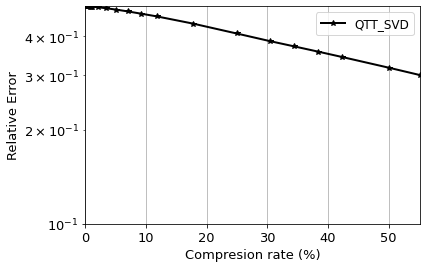

In [67]:
QuanticsTT.run_test()